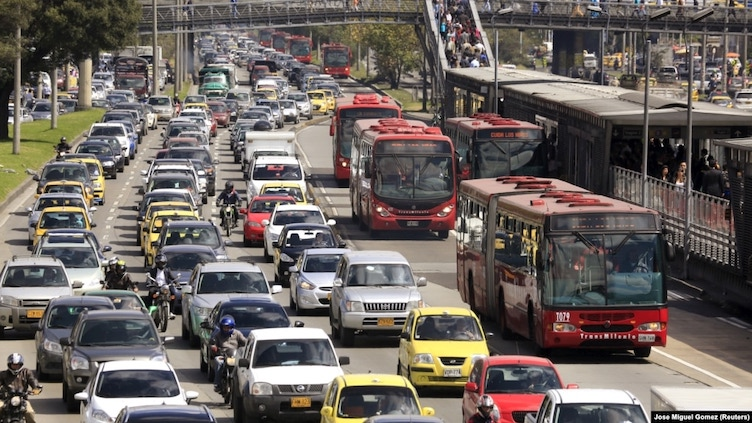

image from https://learningenglish.voanews.com/a/is-there-an-answer-for-traffic-congestion-/5323360.html

# Importing

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly_express as px

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/kaggle/input/worldwide-traffic-congestion-ranking/TrafficIndex_19Jun2022-26Jun2022.csv')

In [ ]:
df.head()

# Data Preprocessing

get the location data of cities

In [ ]:
from geopy.geocoders import Nominatim
 
geolocator = Nominatim(user_agent="test")
 
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
df['location'] = df['City'].apply(geocode)
df['point'] = df['location'].apply(lambda loc: tuple(loc.point) if loc else None)

In [ ]:
df

In [ ]:
df['latitude']=df['point'].str[0]
df['longitude']=df['point'].str[1]

In [ ]:
df

In [ ]:
df.info()

# Average TCI

Top 10 cities

In [ ]:
df.sort_values(by="AverageTCI",ascending=True).tail(10).plot.barh(x='City',y='AverageTCI')

Global map of average TCI

In [ ]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='City',hover_data=['AverageTCI'],color='AverageTCI',
    size="AverageTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=700,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Average TCI")
fig.show()

# Case Study1: Lagos

Lagos is the highest in AverageTCI. What is happening in Lagos ?

I found the article 'Trafic Lagos Congestion in Lagos' ( https://www.internetgeography.net/topics/traffic-congestion-in-lagos/ ).

According to the article,

1.WHAT IMPACT DOES TRAFFIC CONGESTION HAVE ON PEOPLE IN LAGOS?

Lagos is one of the most congested cities in the world. 40 per cent of cars in Nigeria are registered in Lagos. Commuters spend at least three hours in traffic each day. Traffic congestion leads to many problems for the residents of Lagos. For example, the fatal accident rate in Lagos is 28 per 100,000 people. This is three times greater than in most European cities. Also, air pollution is over 5 times greater than the recommended limit.

2.WHAT EFFORTS HAVE BEEN MADE TO REDUCE TRAFFIC CONGESTION?

The Lagos Metropolitan Area Transport Authority (LAMATA) was set up by the Lagos state government in 2003 to improve transport in the city. The Authority set up a bus rapid transit (BRT) system that runs from north-south from the suburbs to the CBD on Lagos Island. The system provides a dedicated land for buses. Over 200,000 people use the system each day. The public transport system is supported by a large fleet of minibus taxis called ‘danfos’. These buses are designed to carry ten to fifteen people but often carry more.

3.HOW COULD A TRANSPORT MASTER PLAN HELP LAGOS?

A new light railway scheme is being developed in Lagos. The first stage of the Lagos Rail Mass Transit (LRMT) opened in 2016 and runs from a west-east route into the CBD. The system carries seven times as many passengers as the BRT. There are plans to develop the network to incorporate seven further rail lines. This is part of a wider Strategic Transport Master Plan for Lagos which includes:

* an integrated transport system that links road, rail and waterway networks;

* a waterway network of ferries making use of the water around Lagos;

* a road network with separate bus lanes;

* a new airport further away from the urban environment;

* the development of mixed-use urban developments combining residential and commercial areas to reduce the number of journeys people need to make;

* better walking and cycling facilities.

reference : 'Trafic Lagos Congestion in Lagos' ( https://www.internetgeography.net/topics/traffic-congestion-in-lagos/ )

# Max TCI

Top 10 cities

In [ ]:
df.sort_values(by="MaxTCI",ascending=True).tail(10).plot.barh(x='City',y='MaxTCI')

Global map of Max TCI

In [ ]:
fig = px.scatter_mapbox(df,lat='latitude',lon='longitude',hover_name='City',hover_data=['MaxTCI'],color='MaxTCI',
    size="MaxTCI",size_max=20,opacity=0.4,
    center={'lat':50, 'lon':9},
    zoom=1,
    height=700,
    width=1000)
fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(title_text="City Map for Max TCI")
fig.show()

# Case Study2: Istanbul

Istanbul is the highest in MaxTCI. What is happening in Istanbul ?

I found the article 'WORLD DESIGN TALKS TRAFFIC CONGESTION - ISTANBUL REPORT' ( https://wdo.org/programmes/wd-talks/traffic-congestion/ ).

According to the article,

Fuelled by the desire for a better quality of life (whether due to poverty, rural unemployment, conflict), people are flooding into urban areas at an unprecedented rate. Rapid urbanization may help lift standards of living, but it also puts a tremendous strain on city services, such as housing, education, health care and transportation.

One of the fastest growing cities in the world with a population of 14 million, Istanbul was not created with modern transport in mind, and its infrastructure is unable to keep up with the demands of a growing population, estimated to reach an unsustainable 20-22 million by 2020. This megacity is the third most congested, after Mexico and Bangkok, with a 50% increase in travel times when compared to free flow traffic (TomTom’s 2016 Traffic Index).

The causes of traffic congestion in Istanbul are numerous and include poorly planned roadways and transportation systems, poorly timed traffic signals, insufficient traffic system coordination, traffic accidents, special events (ex: concerts, festivals), and the unexploited use of Istanbul’s seaways and sea transportation.

According to Prof. Dr. Murat Çelik of Istanbul Technical University, traffic congestion costs Istanbul more than 3 billion Turkish Liras per year due to loss of labour and excess fuel consumption, just about equal to Turkey’s GDP.

Reducing traffic congestion would address various targets set by the UN Sustainable Development Goals, helping to reduce greenhouse gas emissions and to improve air quality, a major health problem in most megacities.


* REDUCING TRAFFIC CONGESTION: SHORT, MID AND LONG TERM SOLUTIONS

Short-term solutions

Encourage sustainable transportation through public transportation, and incentivize people to use public transportation with economical fares that are socially equitable and accessible for all. Public transport improvements would also include automatic vehicle licensing and real time arrival information.
Implement congestion pricing; price according to the number of people in a car and the time of day (toll for people who travel to town during high peak times; high parking fares can discourage people from using their cars downtown)

Mid-term solutions

Facilitate travel demand management by:
Stuttering travel times
Encouraging businesses to adopt telecommuting (working from home)
Encouraging car-free zones, pedestrians, bicycle use and better pedestrian/bicycle connections
Improving land use through smart growth policies (non-dense settlements and exclusive zoning)
Designing transit strategies that encourage people to use high occupancy vehicles and public transportation.
Use technology (such as GPS, digital maps) to help educate citizens and help them make better transportation choices. Digital platforms (apps) can also help to better integrate the transportation system so that citizens can plan their trips in real time.
Transform culture, attitudes, and behaviours with regard to transportation.
Pedestrianize the inner city to transform the human experience in downtown Istanbul and improve quality of life.
Incorporate intelligent route finding to free up urban space for such activities as strolling around and communication.
Add electronic or hybrid cars to the fleet of dolmuş to help alleviate greenhouse gas emissions.

Long-term solutions

Link rail, road and water transport on the one hand and public and private means of transport on the other.
Create a sea dolmuş
Improve roadway security design; barriers on shoulders, curbs, roundabouts, advanced signal systems, lane restrictions for high occupancy vehicles (ex: bus lanes) and changeable lane allocation can help calm and manage traffic.
Involve designers in the management and planning of an integrated transportation system. Designers have a unique mindset for solving problems that is distinct from traditional methods of urban planning, industrial design places the needs and experiences of human beings first when designing out traffic congestion.

reference:  'WORLD DESIGN TALKS TRAFFIC CONGESTION - ISTANBUL REPORT' ( https://wdo.org/programmes/wd-talks/traffic-congestion/ ).

# Insight

Both cities, Lagos and Istanbul have about 15 million population and are growing rapidly. 

Lagos:Population

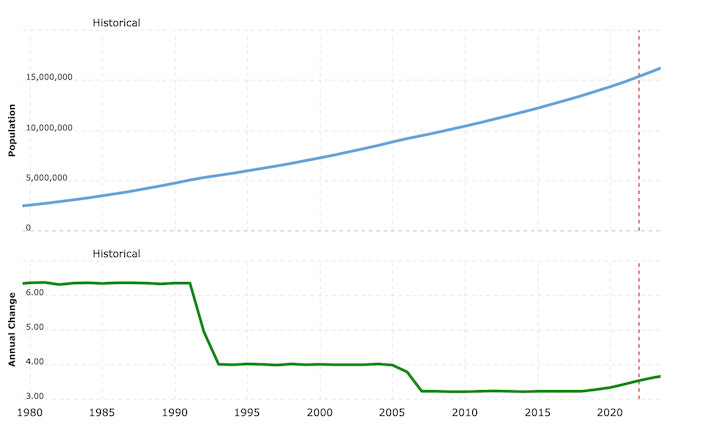

Istanbul: Population

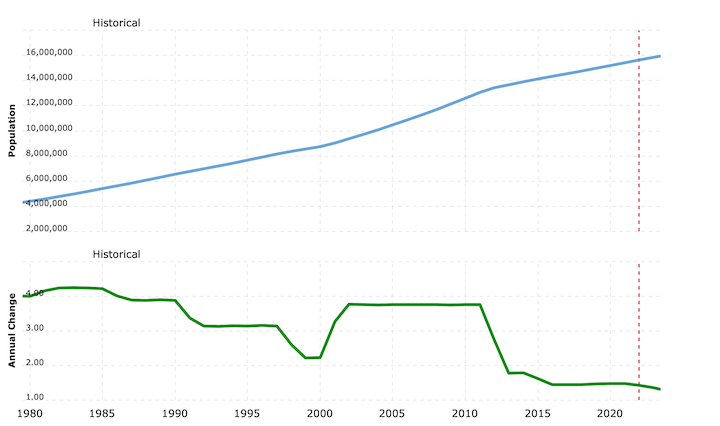

(data from microtrend https://www.macrotrends.net/cities/22691/istanbul/population )


As I can see in the case study of Istanbul, its infrastructure is unable to keep up with the demands of a growing population. The causes of traffic congestion in Istanbul are numerous and include poorly planned roadways and transportation systems, poorly timed traffic signals, insufficient traffic system coordination, traffic accidents, special events (ex: concerts, festivals), and the unexploited use of Istanbul’s seaways and sea transportation. It may be same in Lagos. Implement congestion pricing; price according to the number of people in a car and the time of day will be useful to reduce congestion. But we have to consider long term solution to reduce not only congestion but also CO2 emissions.

In [ ]:
df[df['City']=='Tokyo']

For example, AverageTCI of Tokyo is 10.03. And population of Tokyo which includes metro area is

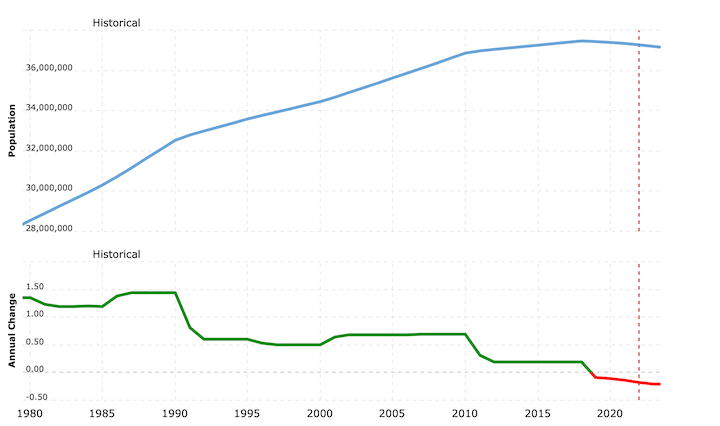

(data from microtrend https://www.macrotrends.net/cities/22691/istanbul/population )

It seems to pass the peak.

And I also found the academic paper ,"Traffic Jams in Japan: does public transit have an impact?" by Gordon Heaton, UC Berkeley Economics Department, which gives me some tips. (https://www.econ.berkeley.edu/sites/default/files/Heaton.pdf)

In this paper, we can find that the length of rail does appear to have an ameliorating effect on road performance, measured by average road speed. Actually, around Tokyo, we have a lot of organized railway.

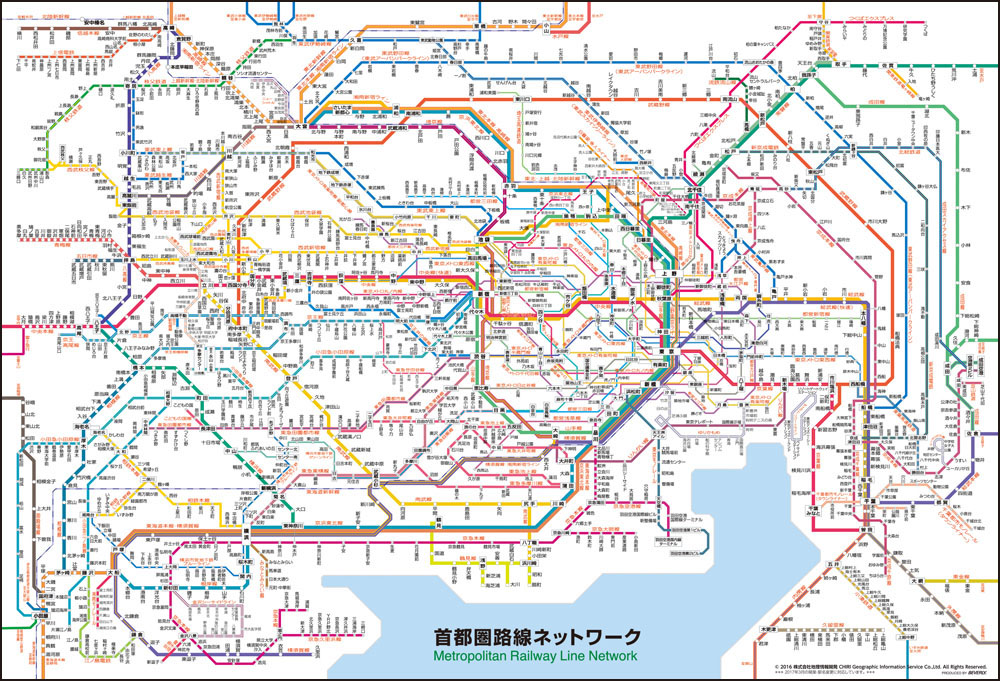


At rush hour in the morning and evening, we are still suffering from a lot of people in the train, but it may help for us to reduce the congestion and CO2 emissions...

Thank you !